## FNNNeurons: Fully Connected Neural Network (Epochs)

### Goal: Here, the investigation will focus on the 8 layer network, but looking into the epochs to see the active learning. 

### 0. Imports

In [177]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch import optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import scipy
import numpy as np
from scipy import stats

### 1. Read Data

In [178]:
mushroom_data = pd.read_csv('raw_data/mushroom_cleaned.csv')
mushroom_data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


### 2. Prepare Data

In [179]:
X = mushroom_data.drop(columns=['class'])
y = mushroom_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# convert to tensors
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32)

### 3. Create NN

#### 3.1: 8 Neurons

In [180]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8,8)
        self.fc3 = nn.Linear(8,8)
        self.fc4 = nn.Linear(8,8)
        self.fc5 = nn.Linear(8,8)
        self.output_layer = nn.Linear(8, 1)


    # feedforward function
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        x = torch.relu(x)
        x = self.fc5(x)
        x = torch.relu(x)
        x = self.output_layer(x)
        return x

#### 4. Train Model

##### 4.1: 8 Neurons

In [181]:
# variables needed
input_size = X_train.shape[1]

# initialize model
model = NeuralNetwork(input_size)

# loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), 0.001)

# training accuracy tracker
train_accuracy = {"epoch": [], "accuracy": []}
weights_by_epoch = {"epoch": [], "weights_l1": [], "weights_l2": [], "weights_l3": [], "weights_l4": [], "weights_l5": []}

# number of training loops
epochs = 5000

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X_train_tensor)


    y_train_tensor = y_train_tensor.view(-1, 1)
    loss = criterion(output, y_train_tensor)

    loss.backward()

    optimizer.step()
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            model.eval()

            outputs = model(X_train_tensor)
            probabilities = torch.sigmoid(outputs)

            predictions = (probabilities > 0.5).float()

            accuracy = (y_train_tensor.flatten() == predictions.flatten()).float().mean()

            train_accuracy["epoch"].append(epoch)
            train_accuracy["accuracy"].append(accuracy.item())
            weights_by_epoch["epoch"].append(epoch)
            weights_by_epoch["weights_l1"].append(model.fc1.weight.data.numpy().flatten())
            weights_by_epoch["weights_l2"].append(model.fc2.weight.data.numpy().flatten())
            weights_by_epoch["weights_l3"].append(model.fc3.weight.data.numpy().flatten())
            weights_by_epoch["weights_l4"].append(model.fc4.weight.data.numpy().flatten())
            weights_by_epoch["weights_l5"].append(model.fc5.weight.data.numpy().flatten())
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item()* 100:.2f}%')
        

model_train_acc = accuracy

Epoch [10/5000], Loss: 0.6972, Accuracy: 54.99%
Epoch [20/5000], Loss: 0.6931, Accuracy: 54.44%
Epoch [30/5000], Loss: 0.6843, Accuracy: 55.24%
Epoch [40/5000], Loss: 0.6734, Accuracy: 56.81%
Epoch [50/5000], Loss: 0.6709, Accuracy: 57.92%
Epoch [60/5000], Loss: 0.6675, Accuracy: 57.88%
Epoch [70/5000], Loss: 0.6637, Accuracy: 59.00%
Epoch [80/5000], Loss: 0.6610, Accuracy: 59.83%
Epoch [90/5000], Loss: 0.6598, Accuracy: 60.61%
Epoch [100/5000], Loss: 0.6588, Accuracy: 60.59%
Epoch [110/5000], Loss: 0.6579, Accuracy: 60.48%
Epoch [120/5000], Loss: 0.6571, Accuracy: 60.47%
Epoch [130/5000], Loss: 0.6565, Accuracy: 60.48%
Epoch [140/5000], Loss: 0.6559, Accuracy: 60.50%
Epoch [150/5000], Loss: 0.6554, Accuracy: 60.51%
Epoch [160/5000], Loss: 0.6548, Accuracy: 60.48%
Epoch [170/5000], Loss: 0.6541, Accuracy: 60.59%
Epoch [180/5000], Loss: 0.6535, Accuracy: 60.70%
Epoch [190/5000], Loss: 0.6530, Accuracy: 60.72%
Epoch [200/5000], Loss: 0.6524, Accuracy: 60.77%
Epoch [210/5000], Loss: 0.651

### 5. Evaluation

##### 5.1: 8 Neurons

In [182]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    
    probabilities = torch.sigmoid(outputs)

    predictions = (probabilities > 0.5).float()

    accuracy = (y_test_tensor.flatten() == predictions.flatten()).float().mean()

print(f"Accuracy: {accuracy.item()* 100:.2f}%")
model_test_acc = accuracy.item()*100

Accuracy: 71.96%


#### 6. Weight Investigation

##### 6.1: 8 Neurons

In [183]:
# dictionary to hold names and weights associated with each layer
model_dict = {"name":[], "weights":[]}

for name, param in model.state_dict().items():
    model_dict["name"].append(name)
    model_dict["weights"].append(param.data.numpy())

##### 6.2: 5 Layers by Epoch

In [184]:
weights_by_epoch_df = pd.DataFrame(weights_by_epoch)
weights_by_epoch_df.head()

,epoch,weights_l1,weights_l2,weights_l3,weights_l4,weights_l5
0,9,"[-0.21681368, -0.3416775, -0.016624946, -0.077...","[0.1297677, -0.20327745, 0.16230038, 0.2282286...","[-0.2703964, 0.07944125, -0.108494714, 0.28344...","[-0.18008578, -0.2909185, 0.23272088, 0.022346...","[0.2739392, -0.23320757, 0.16031207, 0.3262806..."
1,19,"[-0.21704526, -0.34291813, -0.017588595, -0.07...","[0.12711993, -0.2045352, 0.16230038, 0.2386697...","[-0.26851827, 0.07944125, -0.108494714, 0.2839...","[-0.18392643, -0.2801001, 0.23272088, 0.030413...","[0.2706866, -0.23320757, 0.16198455, 0.3349850..."
2,29,"[-0.21575727, -0.3425366, -0.017107839, -0.074...","[0.12577452, -0.20415206, 0.16230038, 0.247107...","[-0.268155, 0.07944125, -0.108494714, 0.282928...","[-0.1859439, -0.26976752, 0.23272088, 0.041121...","[0.26934895, -0.23320757, 0.1650115, 0.3427067..."
3,39,"[-0.21695009, -0.3442219, -0.018913062, -0.074...","[0.12266362, -0.20586674, 0.16230038, 0.251834...","[-0.26603895, 0.07944125, -0.108494714, 0.2846...","[-0.18774742, -0.26005736, 0.23272088, 0.05439...","[0.2686592, -0.23320757, 0.1639961, 0.34736693..."
4,49,"[-0.21720082, -0.34461412, -0.019121947, -0.07...","[0.12072968, -0.20649509, 0.16230038, 0.255280...","[-0.26494884, 0.07944125, -0.108494714, 0.2853...","[-0.1886703, -0.24914102, 0.23272088, 0.068927...","[0.26846397, -0.23320757, 0.16402216, 0.349260..."


In [185]:
less_weights_by_epoch_df = weights_by_epoch_df[::20]
less_accuracy_by_epoch_df = train_accuracy['accuracy'][::20]
less_weights_by_epoch_df

,epoch,weights_l1,weights_l2,weights_l3,weights_l4,weights_l5
0,9,"[-0.21681368, -0.3416775, -0.016624946, -0.077...","[0.1297677, -0.20327745, 0.16230038, 0.2282286...","[-0.2703964, 0.07944125, -0.108494714, 0.28344...","[-0.18008578, -0.2909185, 0.23272088, 0.022346...","[0.2739392, -0.23320757, 0.16031207, 0.3262806..."
20,209,"[-0.2141654, -0.3050447, 0.02611677, -0.036980...","[0.11477054, -0.20732361, 0.16230038, 0.282840...","[-0.25947198, 0.07944125, -0.108494714, 0.2872...","[-0.18346596, -0.15471753, 0.23272088, 0.32033...","[0.26922542, -0.23320757, 0.16303945, 0.350429..."
40,409,"[-0.21950623, -0.1343301, 0.0016642878, -0.034...","[0.11388806, -0.20813535, 0.16230038, 0.193766...","[-0.25556186, 0.2918052, -0.10851843, 0.290311...","[-0.18937118, -0.023232143, 0.23272088, 0.5649...","[0.2766135, -0.23320757, 0.16416162, 0.3504296..."
60,609,"[-0.1869717, -0.065792784, -0.11901221, 0.0232...","[0.11130077, -0.21046497, 0.16230038, 0.137695...","[-0.25648126, 0.61464757, -0.1085186, 0.293416...","[-0.19762371, 0.15233578, 0.22896948, 0.724157...","[0.28498265, -0.23320757, 0.16451433, 0.350429..."
80,809,"[-0.16631697, -0.17246103, -0.108630136, 0.109...","[0.11016207, -0.214372, 0.16230038, 0.13619843...","[-0.26068318, 0.8008112, -0.1085186, 0.2929259...","[-0.20245142, 0.20591836, 0.22652945, 0.759730...","[0.29067528, -0.23320757, 0.16356364, 0.350429..."
100,1009,"[-0.16755044, -0.22087508, -0.03310197, 0.1862...","[0.10833424, -0.21123937, 0.16230038, 0.230205...","[-0.25948673, 1.0811164, -0.1085186, 0.2983867...","[-0.21068786, 0.2708635, 0.22498241, 0.8262579...","[0.29782027, -0.23320757, 0.16061811, 0.350429..."
120,1209,"[-0.16111562, -0.3267625, -0.014291354, 0.1572...","[0.10840052, -0.21163897, 0.16230038, 0.234007...","[-0.2647719, 1.2743237, -0.1085186, 0.2979745,...","[-0.21159644, 0.31714427, 0.22498241, 0.882649...","[0.3062718, -0.23320757, 0.15668733, 0.3504296..."
140,1409,"[-0.15640183, -0.36298403, -0.012389854, 0.130...","[0.10753553, -0.21208337, 0.16230038, 0.260132...","[-0.26650965, 1.3854108, -0.1085186, 0.2977645...","[-0.20976049, 0.33511773, 0.22498241, 0.953739...","[0.31069392, -0.23320757, 0.15133923, 0.350429..."
160,1609,"[-0.15084402, -0.38016397, 0.041138567, 0.1040...","[0.10547136, -0.21229833, 0.16230038, 0.392549...","[-0.26556152, 1.4087981, -0.1085186, 0.2960135...","[-0.20775221, 0.35269973, 0.22498241, 1.001493...","[0.3110457, -0.62016153, 0.147453, 0.3504296, ..."
180,1809,"[-0.1453946, -0.37533885, 0.09970062, 0.067831...","[0.106705576, -0.21141663, 0.16230038, 0.41483...","[-0.26451862, 1.390581, -0.1085186, 0.2930638,...","[-0.20561536, 0.36158496, 0.21924624, 1.047098...","[0.31086227, -0.74871665, 0.14575487, 0.350429..."


In [186]:
less_accuracy_by_epoch_df

[0.5498750805854797,
 0.607962429523468,
 0.6109928488731384,
 0.6347274780273438,
 0.6449986100196838,
 0.6540899276733398,
 0.6579763293266296,
 0.6563569903373718,
 0.6716480255126953,
 0.6728046536445618,
 0.6759970188140869,
 0.6820347905158997,
 0.6711390614509583,
 0.6847182512283325,
 0.6891135573387146,
 0.6929536461830139,
 0.6933931708335876,
 0.6989914178848267,
 0.6990376710891724,
 0.7013741135597229,
 0.7034098505973816,
 0.7046127319335938,
 0.7062089443206787,
 0.7079207897186279,
 0.7114139199256897]

In [187]:
condensed_weights_by_epoch_df = less_weights_by_epoch_df.copy()
condensed_weights_by_epoch_df['all_weights_combined'] = condensed_weights_by_epoch_df[['weights_l1', 'weights_l2', 'weights_l3', 'weights_l4', 'weights_l5']].apply(lambda x: np.concatenate(x), axis=1)
condensed_weights_by_epoch_df = condensed_weights_by_epoch_df.drop(columns=['weights_l1', 'weights_l2', 'weights_l3', 'weights_l4', 'weights_l5'])
condensed_weights_by_epoch_df.head()

,epoch,all_weights_combined
0,9,"[-0.21681368, -0.3416775, -0.016624946, -0.077..."
20,209,"[-0.2141654, -0.3050447, 0.02611677, -0.036980..."
40,409,"[-0.21950623, -0.1343301, 0.0016642878, -0.034..."
60,609,"[-0.1869717, -0.065792784, -0.11901221, 0.0232..."
80,809,"[-0.16631697, -0.17246103, -0.108630136, 0.109..."


#### 7. Visualization

##### 7.1: 8 Neurons Weights by Epoch

Text(151.72222222222223, 0.5, 'Weight Value')

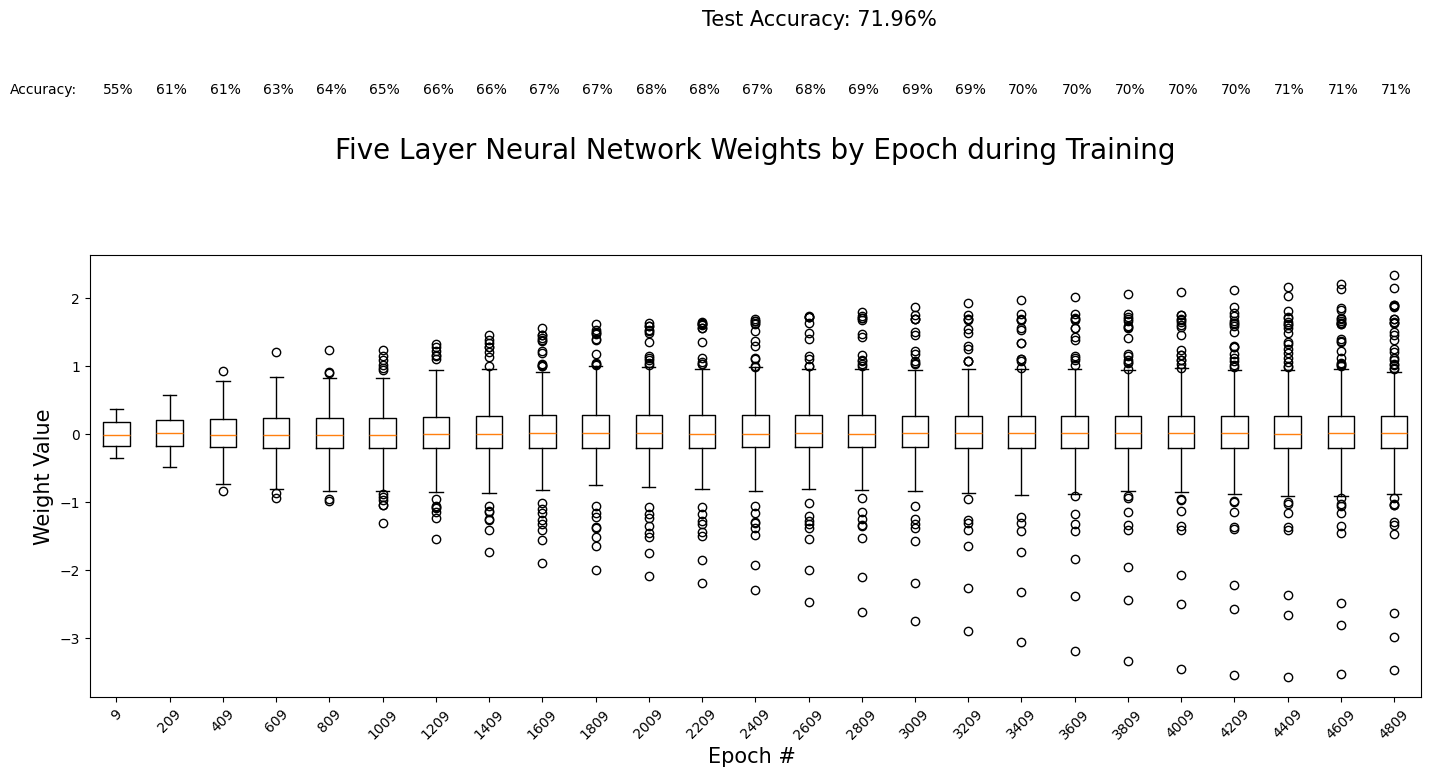

In [189]:
epoch_boxplot_dict = {"boxes":[], "x_labels":[]}
for i in range(0, condensed_weights_by_epoch_df.shape[0]):
    epoch_boxplot_dict["boxes"].append(condensed_weights_by_epoch_df.iloc[i, 1])
    epoch_boxplot_dict["x_labels"].append(condensed_weights_by_epoch_df.iloc[i, 0])

plt.figure(figsize=(15,7.5))
plt.boxplot(epoch_boxplot_dict['boxes'])
plt.title("Five Layer Neural Network Weights by Epoch during Training", y =1.2, fontsize = 20)
plt.tight_layout(pad =5)
plt.text(12, 6, f"Test Accuracy: {model_test_acc:.2f}%", fontsize = 15)
plt.xlabel("Epoch # ", fontsize = 15)
x_position = .75
y_position = 5  
x_increment = 1 
for item in less_accuracy_by_epoch_df:
    plt.text(x_position, y_position, f"{item*100:.0f}%")
    x_position += x_increment
plt.text(-1, 5, "Accuracy:", fontsize = 10)
plt.xticks(range(1, len(epoch_boxplot_dict['x_labels']) + 1), epoch_boxplot_dict['x_labels'], rotation = 45, fontsize = 10)
plt.ylabel("Weight Value", fontsize = 15)

In [195]:
# for the first epoch recorded (epoch 9)
first_epoch = condensed_weights_by_epoch_df.iloc[0]

# midpoint
midpoint = condensed_weights_by_epoch_df.iloc[condensed_weights_by_epoch_df.shape[0] // 2]

# for the las epoch recorded (epoch 4809)
last_epoch = condensed_weights_by_epoch_df.iloc[-1]


Text(0.5, 1.0, 'Logistic Q-Q Plot')

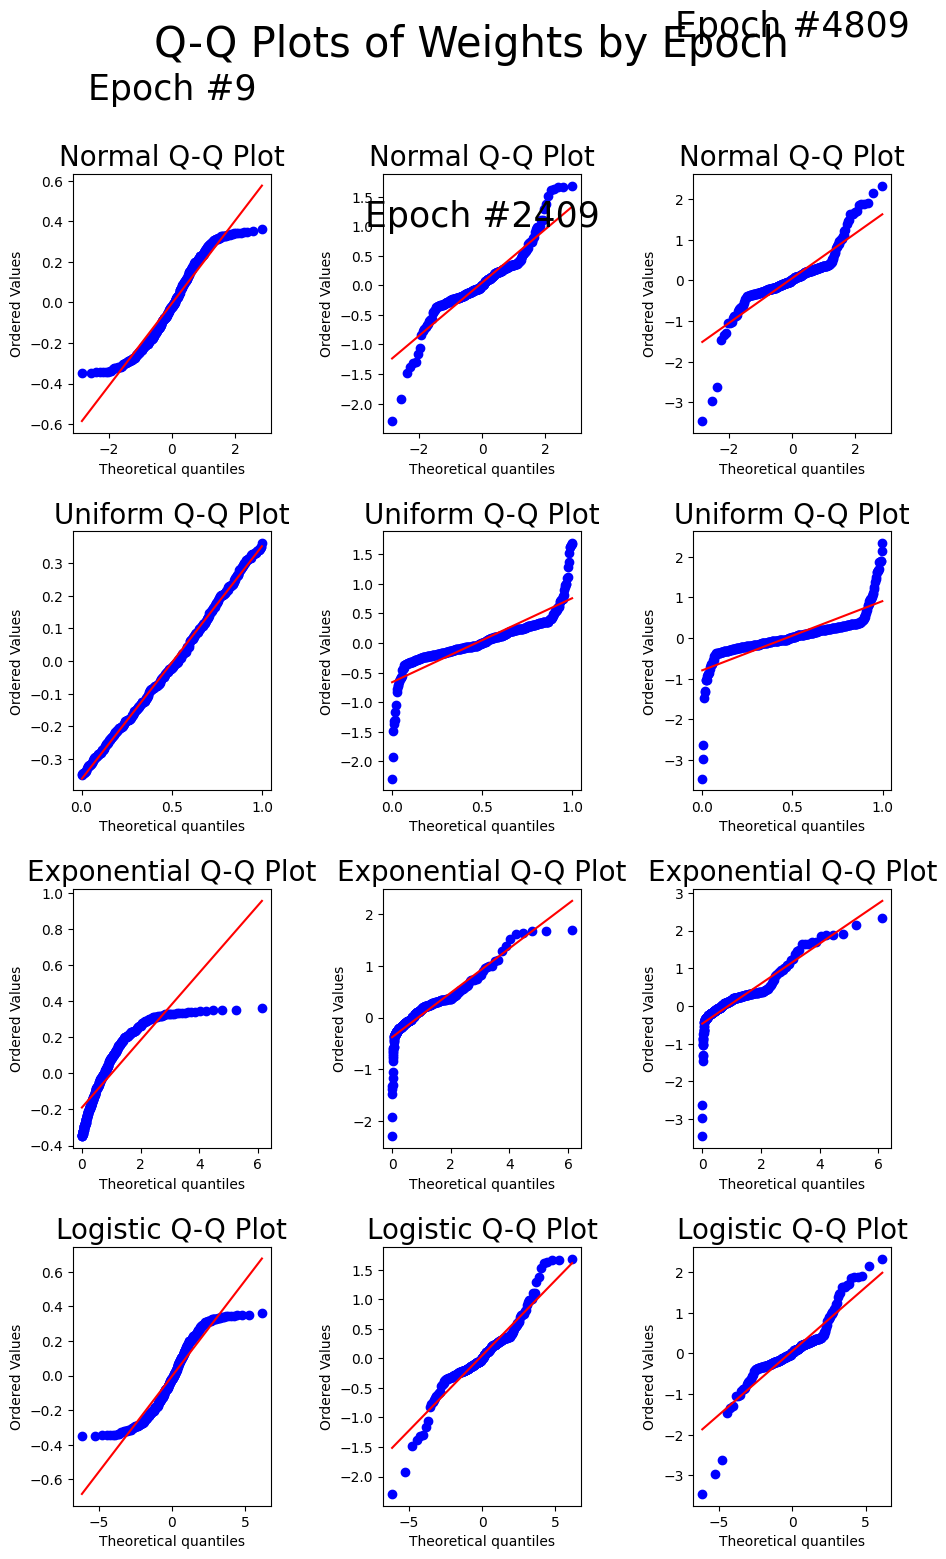

In [196]:
qq_points1 = first_epoch['all_weights_combined']
qq_points2 = midpoint['all_weights_combined']
qq_points3 = last_epoch['all_weights_combined']

fig, axes = plt.subplots(4, 3, figsize=(10, 15))
fig.tight_layout(pad=5)

fig.suptitle("Q-Q Plots of Weights by Epoch", fontsize = 30, y = 1.05)

axes[0,0].text(0, 1, "Epoch #9", fontsize = 25, ha = "center")
stats.probplot(qq_points1, dist = "norm", plot = axes[0,0])
axes[0,0].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points1, dist = "uniform", plot = axes[1,0])
axes[1,0].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points1, dist = "expon", plot = axes[2,0])
axes[2,0].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points1, dist = "logistic", plot = axes[3,0])
axes[3,0].set_title("Logistic Q-Q Plot", fontsize = 20)

axes[0,1].text(0, 1, "Epoch #2409", fontsize = 25, ha = "center")
stats.probplot(qq_points2, dist = "norm", plot = axes[0,1])
axes[0,1].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points2, dist = "uniform", plot = axes[1,1])
axes[1,1].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points2, dist = "expon", plot = axes[2,1])
axes[2,1].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points2, dist = "logistic", plot = axes[3,1])
axes[3,1].set_title("Logistic Q-Q Plot", fontsize = 20)



axes[0,2].text(0, 6, "Epoch #4809", fontsize = 25, ha = "center")
stats.probplot(qq_points3, dist = "norm", plot = axes[0,2])
axes[0,2].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points3, dist = "uniform", plot = axes[1,2])
axes[1,2].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points3, dist = "expon", plot = axes[2,2])
axes[2,2].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points3, dist = "logistic", plot = axes[3,2])
axes[3,2].set_title("Logistic Q-Q Plot", fontsize = 20)



